In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [107]:
df=pd.read_csv('D:\ml projects\multiple linear regression\dataset\dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\WAJEEHA\AppData\Local\Temp\ipykernel_12716\3201448797.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv('D:\ml projects\multiple linear regression\dataset\dataset.csv')


In [108]:
df

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687
...,...,...,...,...,...
995,8,1,6,4,90941.688891
996,12,3,1,2,92074.890941
997,14,10,1,2,115914.944924
998,7,5,0,2,82706.285700


In [109]:
df.info

<bound method DataFrame.info of      Total Experience  Team Lead Experience  Project Manager Experience  \
0                   7                     2                           4   
1                   4                     0                           2   
2                  13                     4                           8   
3                  11                     3                           2   
4                   8                     1                           6   
..                ...                   ...                         ...   
995                 8                     1                           6   
996                12                     3                           1   
997                14                    10                           1   
998                 7                     5                           0   
999                10                     6                           2   

     Certifications         Salary  
0                 1   77318.07

In [110]:
df.shape

(1000, 5)

In [111]:
df.corr()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
Total Experience,1.000000,0.652856,0.477662,-0.019265,0.941849
Team Lead Experience,0.652856,1.000000,-0.100659,-0.029226,0.753772
Project Manager Experience,0.477662,-0.100659,1.000000,0.015441,0.405786
Certifications,-0.019265,-0.029226,0.015441,1.000000,0.009678
Salary,0.941849,0.753772,0.405786,0.009678,1.000000


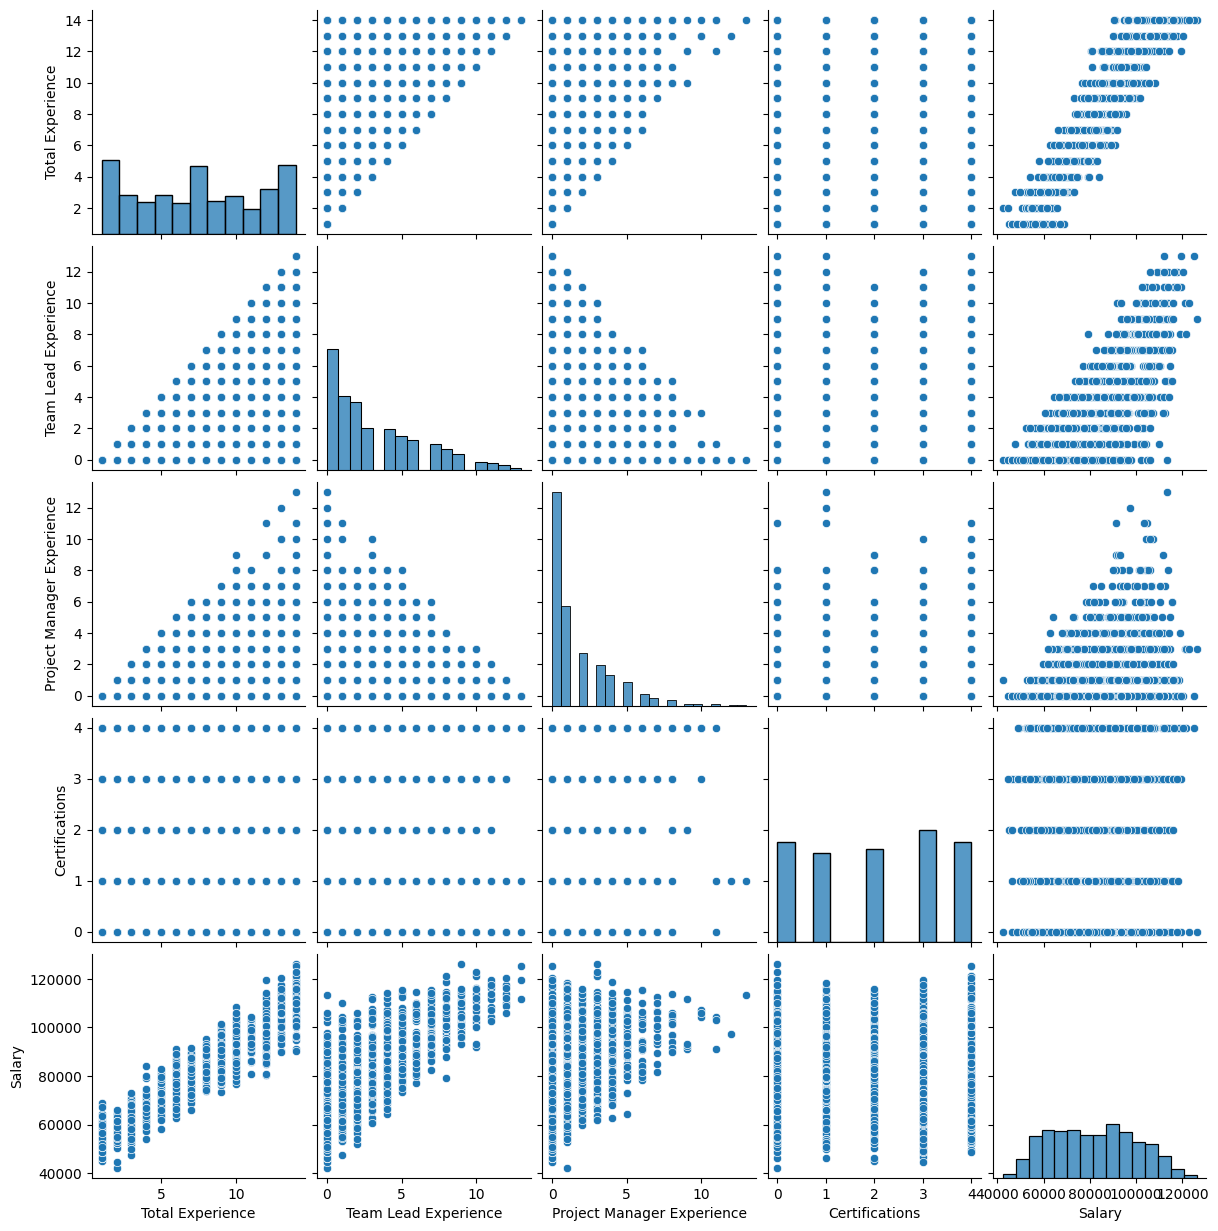

In [112]:
#searborn for visualization
import seaborn as sns
sns.pairplot(df)

In [113]:
x = df[['Total Experience','Team Lead Experience','Project Manager Experience']]
y = df['Salary']


In [114]:
y

0       77318.070547
1       64951.950980
2      106058.185204
3       89649.944851
4       82206.019687
           ...      
995     90941.688891
996     92074.890941
997    115914.944924
998     82706.285700
999     85347.167601
Name: Salary, Length: 1000, dtype: float64

In [115]:
x.head()


,Total Experience,Team Lead Experience,Project Manager Experience
0,7,2,4
1,4,0,2
2,13,4,8
3,11,3,2
4,8,1,6


In [116]:
##Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [117]:
x_train

,Total Experience,Team Lead Experience,Project Manager Experience
29,1,0,0
535,8,0,0
695,9,2,1
557,8,7,0
836,9,8,0
...,...,...,...
106,13,11,1
270,14,3,0
860,4,0,3
435,1,0,0


## Standardize the dataset

In [118]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## model training

In [119]:
# Training the Model Apply Simple multipleLinear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [120]:
## coefficient and intercepts
print("Coefficient or slop ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or slop  [12148.23140352  5956.85392612  2110.21075209]
Intercept :  81816.28528238442


In [121]:
#preiction for test data
y_pred_test=regression.predict(x_test)

In [122]:
#Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [123]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

21232871.211607613
3771.7950094277157
4607.913976150989


In [124]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.939435540423083


In [125]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9385085333887424

In [126]:
import statsmodels.api as sm

In [127]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

In [128]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              11.97
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                    1.13e-07
Time:                        14:13:32   Log-Likelihood:                         -10186.
No. Observations:                 800   AIC:                                  2.038e+04
Df Residuals:                     797   BIC:                                  2.039e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [129]:
regression.coef_

array([12148.23140352,  5956.85392612,  2110.21075209])